# Extreme Gradient Boost


### Initialization

In [8]:

from xgboost import XGBRegressor
from utility import start
from utility import train
from utility import display

X_train, X_test, y_train, y_test, df = start("encoded_data_04_13.csv")

In [9]:

model = XGBRegressor(n_estimators=500, max_depth=7, random_state=42)
y_pred, y_pred_original, y_test_original = train(model, X_train, X_test, y_train, y_test)
a

Training Set Scores:
Mean Absolute Error (MAE): 0.98 M
Mean Absolute Percentage Error (MAPE): 26.08 %

Test Set Scores:
Mean Absolute Error (MAE): 1.71 M
Mean Absolute Percentage Error (MAPE): 48.57 %


In [10]:
results, z = display(df, X_test, y_pred)
results


,name,year,market_value_in_eur,Predicted_Value
34793,Neymar,2017.75,180000000.0,1.291614e+08
115380,Jude Bellingham,2023.75,180000000.0,3.168652e+08
24167,Eden Hazard,2019.25,150000000.0,1.090969e+08
97626,Kylian Mbappé,2018.25,150000000.0,3.433783e+07
56498,Harry Kane,2019.25,150000000.0,7.479799e+07
...,...,...,...,...
107772,Qingshen Zeng,2018.75,25000.0,1.597508e+05
115609,Sekou Sylla,2021.75,25000.0,4.521013e+05
102760,Tanaka Chinyahara,2016.25,25000.0,6.029351e+04
91119,Hasan Kurucay,2017.25,25000.0,1.264961e+05


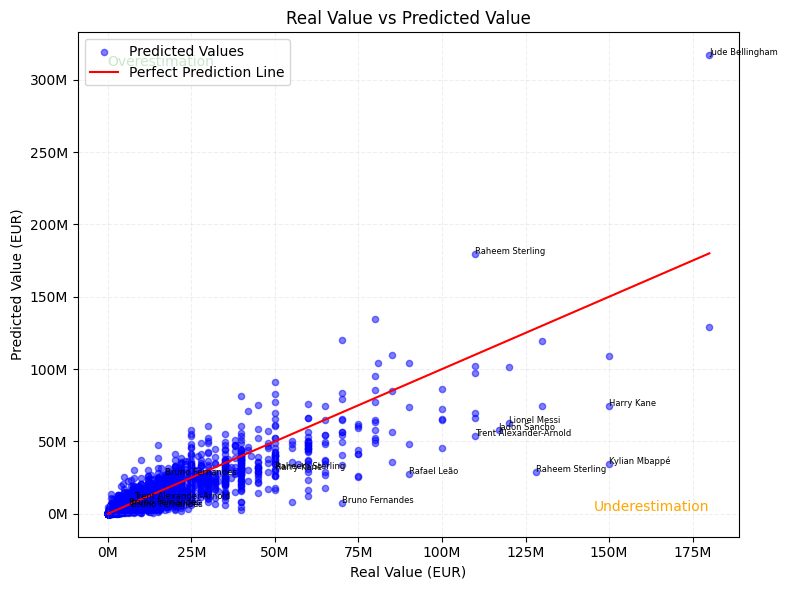

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
# Calculate distances of each point from the optimal line
distances = np.abs(y_pred_original - y_test_original)

# Find the indices of points with maximum distances
max_distance_indices = np.argsort(distances)[-10:]  # Adjust the number to show more or fewer names

# Get the corresponding player names
furthest_names = z.iloc[max_distance_indices]['name'].tolist()

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred_original, s=20, color='blue', alpha=0.5, marker='o', label='Predicted Values')
plt.xlabel("Real Value (EUR)")
plt.ylabel("Predicted Value (EUR)")
plt.title("Real Value vs Predicted Value")
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red', label='Perfect Prediction Line')
plt.text(min(y_test_original), max(y_pred_original), "Overestimation", fontsize=10, color='green', verticalalignment='top', horizontalalignment='left')
plt.text(max(y_test_original), min(y_pred_original), "Underestimation", fontsize=10, color='orange', verticalalignment='bottom', horizontalalignment='right')

# Annotate only the furthest points
for index, row in z.iterrows():
    if row['name'] in furthest_names:
        plt.annotate(row['name'], (row['market_value_in_eur'], row['Predicted_Value']), fontsize=6, color='black')

# Set formatter for x-axis and y-axis
def millions_formatter(x, pos):
    return f'{x / 1000000:.0f}M'

formatter = FuncFormatter(millions_formatter)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid(alpha=0.2, linestyle='--', zorder=1)
plt.legend()
plt.tight_layout()
plt.show()


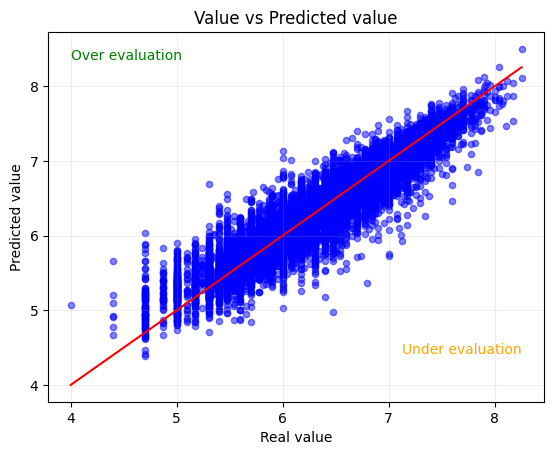

In [12]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(y_test, y_pred, s=20, color='blue', alpha=0.5)  # Set dot size to 20, blue color, and transparency to 0.5
plt.xlabel("Real value")
plt.ylabel("Predicted value")
plt.title("Value vs Predicted value")

# Add diagonal line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.text(min(y_test), max(y_pred), "Over evaluation", fontsize=10, color='green', verticalalignment='top', horizontalalignment='left')
plt.text(max(y_test), min(y_pred), "Under evaluation", fontsize=10, color='orange', verticalalignment='bottom', horizontalalignment='right')
plt.grid(alpha=0.2, zorder=1)

plt.show()


20000000.0


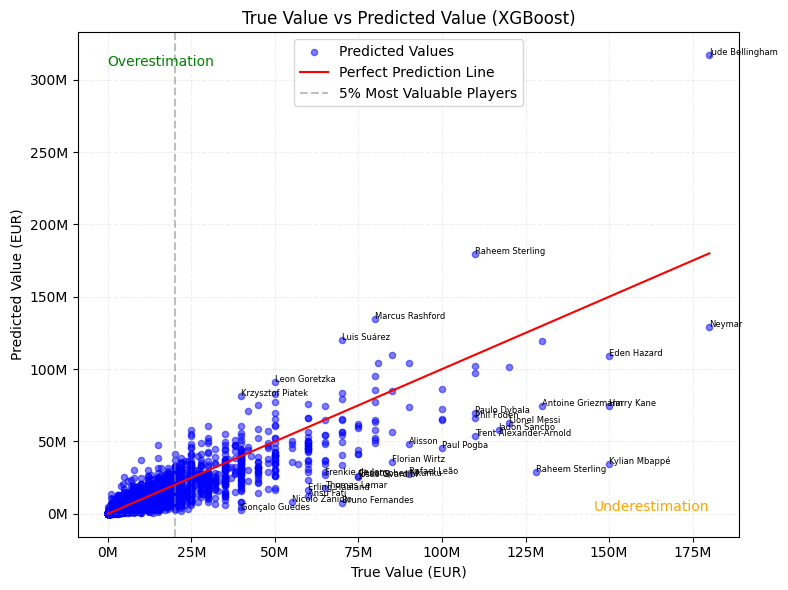

In [13]:
import numpy as np

# Calculate distances of each point from the optimal line
distances = np.abs(y_pred_original - y_test_original)

# Find the indices of points with maximum distances
max_distance_indices = np.argsort(distances)[-30:]  # Adjust the number to show more or fewer names

# Get the corresponding player names
furthest_names = z.iloc[max_distance_indices]['name'].tolist()

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred_original, s=20, color='blue', alpha=0.5, marker='o', label='Predicted Values')
plt.xlabel("True Value (EUR)")
plt.ylabel("Predicted Value (EUR)")
plt.title("True Value vs Predicted Value (XGBoost)")
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red', label='Perfect Prediction Line')
plt.text(min(y_test_original), max(y_pred_original), "Overestimation", fontsize=10, color='green', verticalalignment='top', horizontalalignment='left')
plt.text(max(y_test_original), min(y_pred_original), "Underestimation", fontsize=10, color='orange', verticalalignment='bottom', horizontalalignment='right')

# Annotate only the furthest points
for index in max_distance_indices:
    row = z.iloc[index]
    plt.annotate(row['name'], (row['market_value_in_eur'], row['Predicted_Value']), fontsize=6, color='black')

# Set formatter for x-axis and y-axis
def millions_formatter(x, pos):
    return f'{x / 1000000:.0f}M'

# Identify the 1% most valuable players
top_1_percent = z.nlargest(int(len(z) * 0.05), 'market_value_in_eur')
top_1_percent = top_1_percent.sort_values(by='market_value_in_eur')
lowest_value_player = top_1_percent.iloc[0]['market_value_in_eur']
# Add vertical line for the 1% most valuable players
print(lowest_value_player)
plt.axvline(x=lowest_value_player, color='gray', linestyle='--', label='5% Most Valuable Players', alpha=0.5)
    
formatter = FuncFormatter(millions_formatter)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid(alpha=0.2, linestyle='--', zorder=1)
plt.legend()
plt.tight_layout()
plt.show()


In [14]:
XGBRegressor.plot_importance(model)

AttributeError: type object 'XGBRegressor' has no attribute 'plot_importance'